Created by Chinara Siwi N.

# Kaggle Setup

In [ ]:
#Upload Kaggle API Key
from google.colab import files
files.upload()  #Upload kaggle.json

In [ ]:
#Install and Setup Kaggle API
!pip install kaggle

import shutil

# Ensure the .kaggle directory exists
!mkdir -p /root/.kaggle

# Move the uploaded kaggle.json to the .kaggle directory
shutil.move('kaggle.json', '/root/.kaggle/kaggle.json')

In [ ]:
#Verifying the file placement
!ls /root/.kaggle

In [ ]:
!kaggle datasets download -d pamalkrmondal/munnar-hotel-data

In [6]:
!unzip munnar-hotel-data.zip

Archive:  munnar-hotel-data.zip
  inflating: Data Analyst munnar Dataset.csv  


# Exploratory Data Analysis

In [7]:
import pandas as pd
df = pd.read_csv('Data Analyst munnar Dataset.csv')
df.head()

,Hotel Name\t\t\t\t\t\t\t\t\t,Rating,Rating Description,Reviews,Star Rating,Location,Nearest Landmark,Distance to Landmark,Price,Tax
0,Gokulam Park,4.1,Very Good,1058,4.0,Chithirapuram,city centre,10.2 km,"2,728",574
1,Sterling Munnar,3.8,Very Good,1088,4.0,Chinnakanal,city centre,19.2 km,"4,451",969
2,Issacs Residency,4.1,Very Good,322,3.0,Central Munnar,Attukal Waterfalls,950 m,"2,758",684
3,Tea Valley Resort,4.3,Excellent,1337,4.0,Pallivasal,city centre,4.8 km,"2,675",756
4,Grand Plaza,4.3,Excellent,1058,4.0,Moolakadai,Attukal Waterfalls,1.9 km,"3,203",654


In [8]:
# Rename column Hotel Name
df.rename(columns={'Hotel Name\t\t\t\t\t\t\t\t\t':'Hotel Name'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Hotel Name            74 non-null     object 
 1   Rating                74 non-null     float64
 2   Rating Description    74 non-null     object 
 3   Reviews               74 non-null     int64  
 4   Star Rating           57 non-null     float64
 5   Location              74 non-null     object 
 6   Nearest Landmark      74 non-null     object 
 7   Distance to Landmark  74 non-null     object 
 8   Price                 74 non-null     object 
 9   Tax                   72 non-null     object 
dtypes: float64(2), int64(1), object(7)
memory usage: 5.9+ KB


In [9]:
# Check unique values
# df['Price'].unique()
df['Tax'].unique()

array(['574', '969', '684', '756', '654', '848', '713', '554', '530',
       '1,141', '1,026', '2,682', '634', '1,177', '229', '2,380', '269',
       '946', '4,617', '693', '366', '346', '2,092', '586', '1,216',
       '1,134', nan, '678', '865', '596', '156', '378', '290', '875',
       '792', '2,925', '519', '1,872', '930', '711', '653', '1,346',
       '589', '599', '2,531', '567', '429', '352', '557', '638', '741',
       '506', '923', '3,038', '953', '213', '860', '445', '472', '1,237',
       '410', '342', '484', '1,982', '418', '665', '847', '2,178', '808',
       '2,124', '223'], dtype=object)

In [10]:
# Delete comma delimiter in tax and price
df['Tax'] = df['Tax'].str.replace(',', '')
df['Price'] = df['Price'].str.replace(',', '')
df.head()

,Hotel Name,Rating,Rating Description,Reviews,Star Rating,Location,Nearest Landmark,Distance to Landmark,Price,Tax
0,Gokulam Park,4.1,Very Good,1058,4.0,Chithirapuram,city centre,10.2 km,2728,574
1,Sterling Munnar,3.8,Very Good,1088,4.0,Chinnakanal,city centre,19.2 km,4451,969
2,Issacs Residency,4.1,Very Good,322,3.0,Central Munnar,Attukal Waterfalls,950 m,2758,684
3,Tea Valley Resort,4.3,Excellent,1337,4.0,Pallivasal,city centre,4.8 km,2675,756
4,Grand Plaza,4.3,Excellent,1058,4.0,Moolakadai,Attukal Waterfalls,1.9 km,3203,654


In [11]:
# Check missing values
df.isnull().sum()

,0
Hotel Name,0
Rating,0
Rating Description,0
Reviews,0
Star Rating,17
Location,0
Nearest Landmark,0
Distance to Landmark,0
Price,0
Tax,2


In [12]:
# Check on the data with missing values in tax or star rating columns
df[df['Tax'].isnull() | df['Star Rating'].isnull()]

,Hotel Name,Rating,Rating Description,Reviews,Star Rating,Location,Nearest Landmark,Distance to Landmark,Price,Tax
12,Chithirapuram Palace | Rooms & Restaurant\nLik...,4.5,Excellent,96,NaN,Chithirapuram,city centre,10.8 km,2494,634
14,Sn Holiday Home,4.2,Very Good,369,NaN,Anachal,city centre,11.1 km,966,229
16,Landy Queen Homestay | Rooms & Caretaker,4.5,Excellent,188,NaN,Central Munnar,Attukal Waterfalls,1.1 km,1279,269
21,Tulsi Village Retreat | Treehouse & Cabin Stay...,3.9,Very Good,352,NaN,Adimali,city centre,21.6 km,1545,346
25,Jungle Jive Tree House | Rooms in a Homestay\n...,3.8,Very Good,10,NaN,Munnar,city centre,15.0 km,5204,1134
26,Abad Copper Castle Hill Valley Resort,4.2,Very Good,366,4.0,Near Pothamedu Viewpoint,city centre,3.3 km,4910,NaN
27,Chandys Windy Woods,4.8,Excellent,355,5.0,Chithirapuram,city centre,8.8 km,9000,NaN
30,Munnar Ice Queen | Rooms & Cottages\nLike a 3,4.7,Excellent,112,NaN,Muthuvaankudi,city centre,13.4 km,2410,596
31,Queen Of Munnar | Rooms in a Homestay,2.8,Average,252,NaN,Central Munnar,Attukal Waterfalls,2.2 km,978,156
33,Mercys Munnar Homestay | Room & Caretaker,3.9,Very Good,48,NaN,Munnar,city centre,17.8 km,930,290


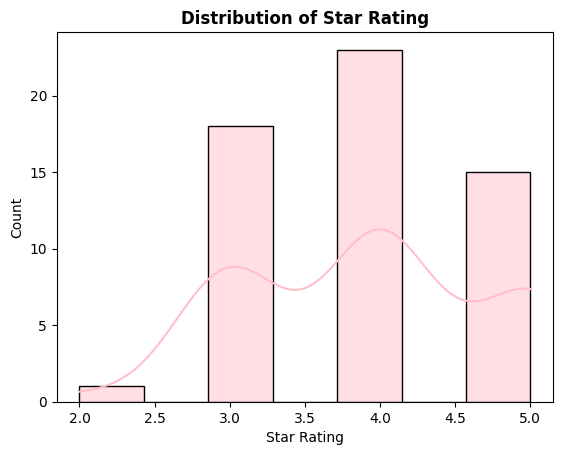

In [13]:
# Check the distribution plot of star rating columns
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['Star Rating'], kde=True, color='#FFC0CB')
plt.title('Distribution of Star Rating', fontweight='bold')
plt.show()

In [21]:
# Fill missing values for star rating with median
df['Star Rating'].fillna(df['Star Rating'].median(), inplace=True)

# Fill missing values for tax with knn imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df['Tax'] = imputer.fit_transform(df[['Tax']])

df.isnull().sum()

,0
Hotel Name,0
Rating,0
Rating Description,0
Reviews,0
Star Rating,0
Location,0
Nearest Landmark,0
Distance to Landmark,0
Price,0
Tax,0


In [22]:
# Change data type of tax and price to integer
df['Tax'] = df['Tax'].astype(int)
df['Price'] = df['Price'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Hotel Name            74 non-null     object 
 1   Rating                74 non-null     float64
 2   Rating Description    74 non-null     object 
 3   Reviews               74 non-null     int64  
 4   Star Rating           74 non-null     float64
 5   Location              74 non-null     object 
 6   Nearest Landmark      74 non-null     object 
 7   Distance to Landmark  74 non-null     object 
 8   Price                 74 non-null     int64  
 9   Tax                   74 non-null     int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 5.9+ KB


In [23]:
# Convert the landmark distance to kilometers
def convert_to_km(distance):
    if 'km' in distance:
        return float(distance.replace(' km', ''))
    elif 'm' in distance:
        return float(distance.replace(' m', '')) / 1000

df['Distance to Landmark'] = df['Distance to Landmark'].apply(convert_to_km)
df.head()

,Hotel Name,Rating,Rating Description,Reviews,Star Rating,Location,Nearest Landmark,Distance to Landmark,Price,Tax
0,Gokulam Park,4.1,Very Good,1058,4.0,Chithirapuram,city centre,10.20,2728,574
1,Sterling Munnar,3.8,Very Good,1088,4.0,Chinnakanal,city centre,19.20,4451,969
2,Issacs Residency,4.1,Very Good,322,3.0,Central Munnar,Attukal Waterfalls,0.95,2758,684
3,Tea Valley Resort,4.3,Excellent,1337,4.0,Pallivasal,city centre,4.80,2675,756
4,Grand Plaza,4.3,Excellent,1058,4.0,Moolakadai,Attukal Waterfalls,1.90,3203,654


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Hotel Name            74 non-null     object 
 1   Rating                74 non-null     float64
 2   Rating Description    74 non-null     object 
 3   Reviews               74 non-null     int64  
 4   Star Rating           74 non-null     float64
 5   Location              74 non-null     object 
 6   Nearest Landmark      74 non-null     object 
 7   Distance to Landmark  74 non-null     float64
 8   Price                 74 non-null     int64  
 9   Tax                   74 non-null     int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 5.9+ KB


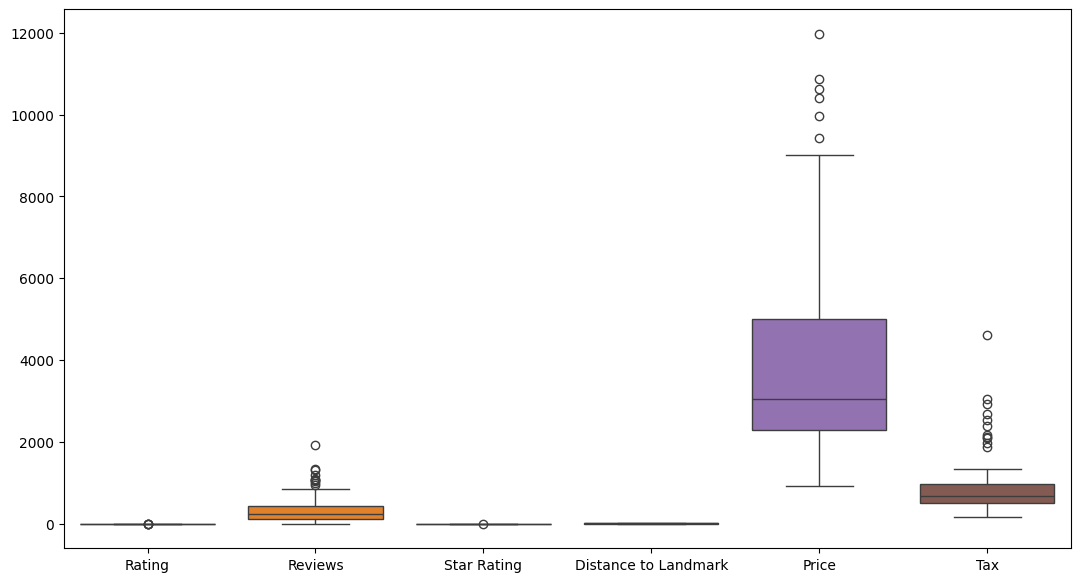

In [ ]:
# Check for outliers
plt.figure(figsize=(13, 7))
sns.boxplot(df)
plt.show()

There are several outliers in the Reviews, Price, and Tax variables.

In [25]:
# Check outliers (IQR Method)
outliers_col = ['Reviews', 'Price', 'Tax']
for col in outliers_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f'Number of outliers in {col}:', len(outliers))

Number of outliers in Reviews: 10
Number of outliers in Price: 6
Number of outliers in Tax: 11


I didn't remove the outliers cause they all had a significant effect on the overall model's performance.

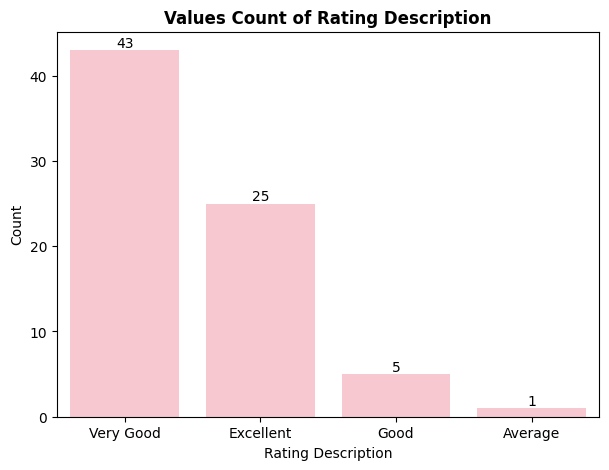

In [ ]:
# Values count plot of rating description
counts = df['Rating Description'].value_counts()
plt.figure(figsize=(7, 5))
bars = sns.barplot(x=counts.index, y=counts.values, color='#FFC0CB')
for bar in bars.patches:
    height = int(bar.get_height())
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')
plt.title('Values Count of Rating Description', fontweight='bold')
plt.ylabel('Count')
plt.show()

In [28]:
df['Rating Description'].count() == df['Hotel Name'].nunique()

True

The majority of hotel ratings fall under 'Very Good,' indicating that **most hotels meet or exceed guests' expectations**. The fact that 'Excellent' is the second most frequent rating reinforces the idea that many hotels are providing an exceptional guest experience.

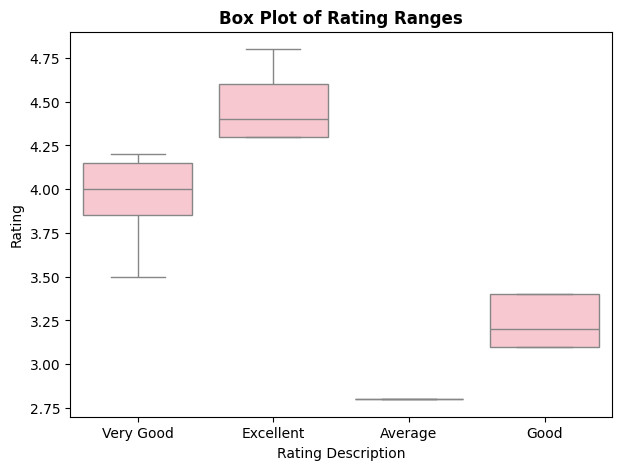

In [ ]:
# Box plot of rating ranges
plt.figure(figsize=(7, 5))
sns.boxplot(x='Rating Description', y='Rating', data=df, color='#FFC0CB')
plt.title('Box Plot of Rating Ranges', fontweight='bold')
plt.ylabel('Rating')
plt.show()

In [ ]:
# Rating ranges of each rating description
rating_ranges = df.groupby('Rating Description')['Rating'].agg(['min', 'max'])
rating_ranges

,min,max
Rating Description,,
Average,2.8,2.8
Excellent,4.3,4.8
Good,3.1,3.4
Very Good,3.5,4.2


In [31]:
df[df['Rating']==2.8]

,Hotel Name,Rating,Rating Description,Reviews,Star Rating,Location,Nearest Landmark,Distance to Landmark,Price,Tax
31,Queen Of Munnar | Rooms in a Homestay,2.8,Average,252,4.0,Central Munnar,Attukal Waterfalls,2.2,978,156


* Hotels with ratings ranging from 4.3 to 4.8 are rated as 'Excellent'.
* In this dataset, there is only 1 hotel rated average (2.8 out of 5).

In [ ]:
# Top 5 hotels with highest price
df.sort_values(by='Price', ascending=False).head()

,Hotel Name,Rating,Rating Description,Reviews,Star Rating,Location,Nearest Landmark,Distance to Landmark,Price,Tax
18,The Panoramic Getaway,4.6,Excellent,939,5.0,Chithirapuram,city centre,9.8,11974,4617
36,ELEPHANT PASSAGE,4.6,Excellent,235,5.0,Anachal,city centre,11.9,10881,2925
54,SpiceTree Munnar Boutique Resort,4.6,Excellent,85,5.0,Periyakanal-Muttukad Road,city centre,22.6,10631,3038
38,Fragrant Nature Munnar,4.5,Excellent,228,5.0,Pallivasal,city centre,4.3,10400,1872
11,Parakkat Nature Resorts,4.3,Excellent,1310,5.0,Pallivasal,city centre,7.8,9977,2682


The five **hotels with the highest price** are all 5⭐ hotels rated 'Excellent' by guests with ratings above 4.3. This indicates that these hotels provide an outstanding and high quality guest experience, which sounds worth the price, right?

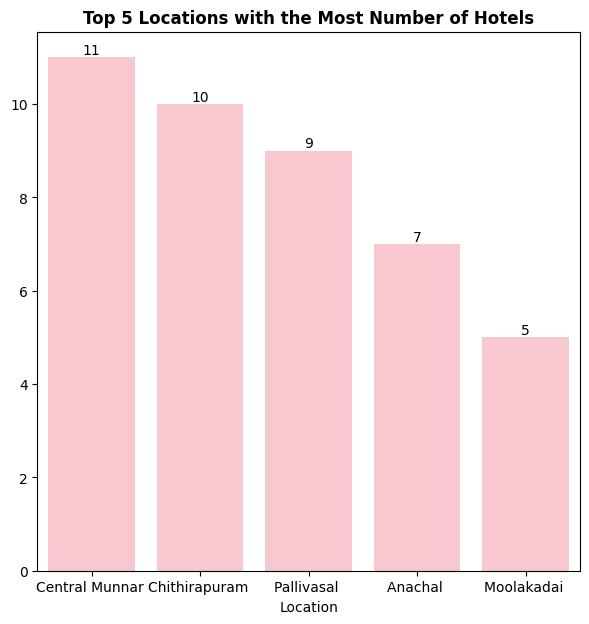

In [ ]:
# Top 5 location with the most number of hotels
counts = df['Location'].value_counts().head()
plt.figure(figsize=(7, 7))
bars = sns.barplot(x=counts.index, y=counts.values, color='#FFC0CB')
for bar in bars.patches:
    height = int(bar.get_height())
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')
plt.title('Top 5 Locations with the Most Number of Hotels', fontweight='bold')
plt.show()

Central Munnar **area has the most number of hotels** in Munnar with a total of 11 hotels, followed by Chithirapuram with 10, Pallivasal with 9, Anachal with 7, and Moolakadai with 5. Entrepreneurs planning to build hotels in these areas need to consider the quite intense competition.

In [ ]:
# Top 5 locations with the highest average hotel price
avg_price_loc = df.groupby('Location')['Price'].mean().sort_values(ascending=False).round(2).head()
avg_price_loc

,Price
Location,
Mankulam,7374.00
Periyakanal-Muttukad Road,7130.00
Pallivasal,5638.11
Muthirapuzhayar Road,5583.00
Ettycity Road,5408.50


Mankulam **area has the highest average hotel price** of INR 7374, followed by Periyakanal-Muttukad Road, Pallivasal, Muthirapuzhayar Road, and Ettycity Road. Entrepreneurs planning to build hotels in these areas need to consider setting the hotel price close to these averages. To attract more customers, setting prices below these averages could be an effective strategy.

In [ ]:
# Group by star rating and calculate the average price and count
star_rating_group = df.groupby('Star Rating').agg(
    avg_price=('Price', 'mean'),   # Calculate average price
    count=('Star Rating', 'count') # Calculate hotels count for each star rating
    ).sort_values(by='avg_price', ascending=False).round(2).head()
star_rating_group

,avg_price,count
Star Rating,,
5.0,8106.67,15
4.0,3154.10,40
3.0,2493.11,18
2.0,2046.00,1


* There are 15 five-star hotels with an average price of around INR 8106.
* There are 40 four-star hotels with an average price of around INR 3154.
* There are 18 three-star hotels with an average price of around INR 2493.
* There are only 1 two-star hotels with a price of INR 2046.

In [ ]:
# Top 5 most popular hotels (based on number of reviews)
df.sort_values(by='Reviews', ascending=False).head()

,Hotel Name,Rating,Rating Description,Reviews,Star Rating,Location,Nearest Landmark,Distance to Landmark,Price,Tax
5,Misty Mountain Resort,4.2,Very Good,1934,4.0,Pallivasal,city centre,7.50,3145,848
3,Tea Valley Resort,4.3,Excellent,1337,4.0,Pallivasal,city centre,4.80,2675,756
11,Parakkat Nature Resorts,4.3,Excellent,1310,5.0,Pallivasal,city centre,7.80,9977,2682
23,Bellmount Resorts,3.9,Very Good,1204,3.0,Central Munnar,Attukal Waterfalls,0.86,2364,586
1,Sterling Munnar,3.8,Very Good,1088,4.0,Chinnakanal,city centre,19.20,4451,969


Misty Mountain Resort leads with the **highest number of reviews** (1934), indicating strong guest engagement and feedback, which possibly make them **the most popular hotel in Munnar**. The fact that the top 3 hotels with the highest number of reviews are located in Pallivasal indicating that this area might be quite popular among visitors.

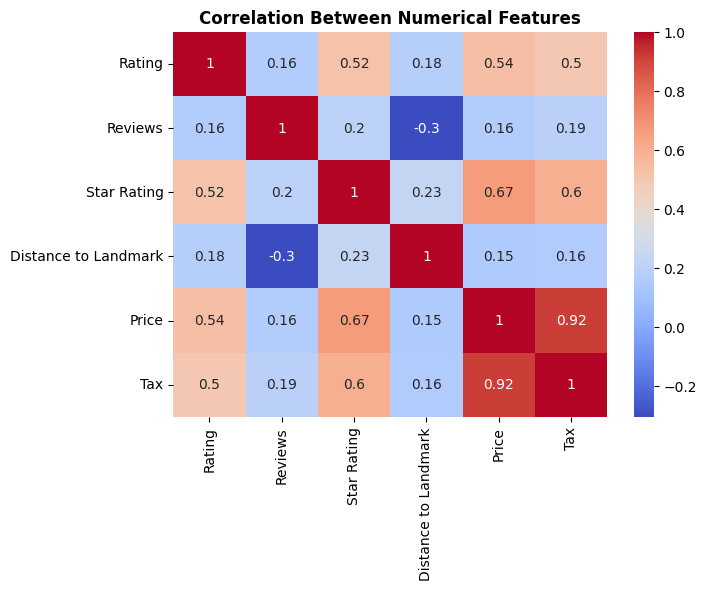

In [ ]:
# Select numerical columns
numcol = df.select_dtypes(include=['int64', 'float64']).columns

# Correlation between numerical features
plt.figure(figsize=(7, 5))
sns.heatmap(df[numcol].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Numerical Features', fontweight='bold')
plt.show()

There is a strong correlation between price and tax features.

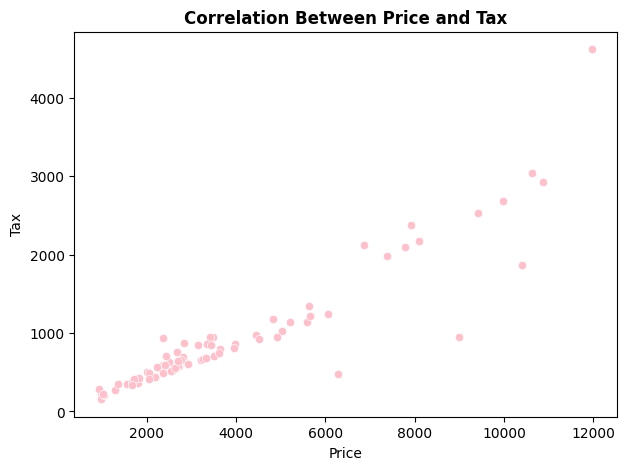

In [ ]:
# Correlation between price and tax
plt.figure(figsize=(7, 5))
sns.scatterplot(x='Price', y='Tax', data=df, color='#FFC0CB')
plt.title('Correlation Between Price and Tax', fontweight='bold')
plt.show()

Price and tax are **positively correlated**, meaning that as the hotel price increases, the tax amount also increases.

Text(0.5, 1.0, 'Correlation Between Distance to Landmark and Price')

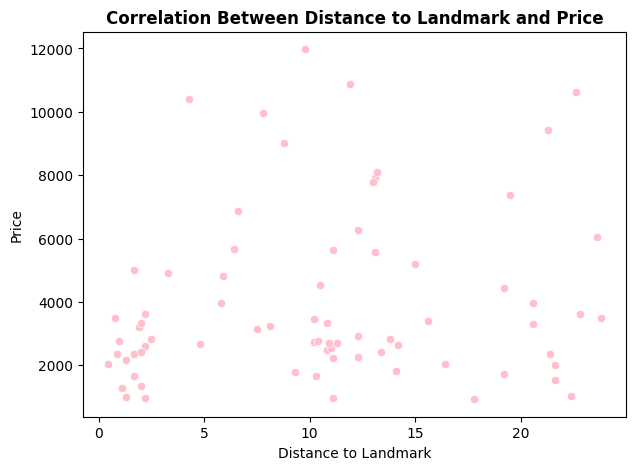

In [ ]:
# Correlation between distance to landmark and price
plt.figure(figsize=(7, 5))
sns.scatterplot(x='Distance to Landmark', y='Price', data=df, color='#FFC0CB')
plt.title('Correlation Between Distance to Landmark and Price', fontweight='bold')

There is **no clear relationship** between distance to landmark and hotel price, meaning that the hotel price doesn't consistently increase or decrease based on how far it is from the landmark.

In [ ]:
# Labeling the categorical columns
df2 = pd.get_dummies(df, columns=['Location', 'Nearest Landmark'], drop_first=True, dtype='int')

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2['Rating Description'] = le.fit_transform(df['Rating Description'])
df2.drop('Hotel Name', axis=1, inplace=True)
df2.head()

,Rating,Rating Description,Reviews,Star Rating,Distance to Landmark,Price,Tax,Location_Ambazhachal,Location_Anachal,Location_Bison Valley,...,Location_Munnar,Location_Muthirapuzhayar Road,Location_Muthuvaankudi,Location_Near Munnar Bus Stand,Location_Near Pothamedu Viewpoint,Location_Pallivasal,Location_Periyakanal-Muttukad Road,Location_Pottankadu,Location_Suryanelli,Nearest Landmark_city centre
0,4.1,3,1058,4.0,10.20,2728,574,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,3.8,3,1088,4.0,19.20,4451,969,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,4.1,3,322,3.0,0.95,2758,684,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.3,1,1337,4.0,4.80,2675,756,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,4.3,1,1058,4.0,1.90,3203,654,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Data Modelling

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Split the dataset
X = df2.drop(['Price'], axis=1)
y = df2['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (only X, not y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Gradient Boosting model
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 696010.26
Mean Absolute Error: 585.27
R-squared: 0.92


The R-squared value of 0.92 indicates that 92% of the variance in the target variable is explained by the model.

Note: Gradient Boosting model gives better result than the Random Forest.

In [ ]:
# Features Importance
importances = model.feature_importances_
importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values('Importance', ascending=False).head()
importances_df

,Feature,Importance
5,Tax,0.819120
3,Star Rating,0.082214
0,Rating,0.041276
4,Distance to Landmark,0.018123
2,Reviews,0.013808


* Tax has the highest importance score, indicating it is the **most significant predictor of hotel price**.
* Star rating also plays a significant role in predicting hotel prices because hotels with higher star ratings generally indicate a beter quality of service or overall guest experience, which leads to higher price.
* High guest ratings reflect positive feedback on the hotel's quality, service, and overall experience. Hotels with high ratings from guests tend to have a better reputation that allow hotels to charge higher prices.